# Name: Jonathan Tso 
# NetID: jtso2
# UIN: 662758603
# Homework: 1

# 2 Drawing your first graph

In [293]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as mp
from pylab import show

data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)

features = []
digits = []


for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) #add in remaining values past the first (this is a matrix)
        digits.append(str(row[0])) #add the 1 or the 5 to digits

#select the proportion of data to use for training
numTrain = int(len(features)*.2) #we are training on 20% of the data

trainFeatures = features[:numTrain] #we train on the first 20% of the data
testFeatures = features[numTrain:]  #we test on the remaining 80%
trainDigits = digits[:numTrain]     #we train on the first 20% of the data
testDigits = digits[numTrain:]      #we test on the remaining 80%

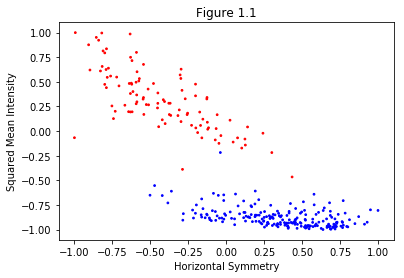

In [294]:
#create the model
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

X = []
Y = []
simpleTrain = []
colors = []
for index in range(len(trainFeatures)):
    X.append((sum(trainFeatures[index])/256)**2) #mean intensity squared
    Y.append(sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256) #horiz symmetry
    simpleTrain.append([(sum(trainFeatures[index])/256)**2,sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256])
    if(trainDigits[index]=="1.0"): #if the digit is 1, it is blue. else, it is red (only 1's and 5's)
        colors.append("b")
    else:
        colors.append("r")
#normalization of X and Y
normX = [2*((i - min(X)) / (max(X) - min(X)))-1 for i in X]
normY = [2*((i - min(Y)) / (max(Y) - min(Y)))-1 for i in Y]

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#this just shows the points

mp.scatter(normX,normY,s=3,c=colors)
mp.title("Figure 1.1")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")
show()

Note: The data has been normalized with respect to [-1,1]



# 3 1-Nearest Neighbor

In this section, color the regions of the graph by which is the closest in your two-dimensional
space. Use Euclidean distance. Use the same normalization and axes that you had in Figure
1.1. Label this Figure 1.2 in your report

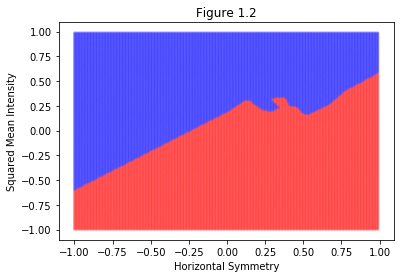

In [295]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(simpleTrain,trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("r")
        else:
            cPred.append("b")

mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.2, )
mp.title("Figure 1.2")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")
show()

3a: I believe this model suffers from overfitting. This is because when looking at Horizontal Symmetry, within the range of .00 through .75, there is an area of fit that curves through with red, indicating that it is trying to accomodate the data more accurately than necessary.

3b: I believe that a 256 dimension model will have greater error. This was tested by running a K-Fold validation test on the SimpleTrain, which is 2 dimension, and trainFeatures, which is 256 dimension. The result was that trainFeatures had a higher error than SimpleTrain, which is likely due to the data being more overfitted, giving us more error.

3a: 10-Fold Cross Validation (Euclidean, 2 Dimensions)

In [296]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")

error = cross_val_score(model, simpleTrain, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 0.9684139784946089


3b: 10-Fold Cross Validation (Manhattan, 2 Dimensions)

In [297]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")

error = cross_val_score(model, simpleTrain, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 0.9684139784946089


3c: 10-Fold Cross Validation (Chebyshev, 2 Dimensions)

In here, we see that the percent error is the same as when we are comparing the euclidean or manhattan, given k_size = 10. This may be due to the fact that we have specified our dimensions rather than using the given dimensions.

In [298]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "chebyshev")

error = cross_val_score(model, simpleTrain, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 0.9684139784946089


3d: 10-Fold Cross Validation (Euclidean, 256 Dimensions)

In [299]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")

error = cross_val_score(model, trainFeatures, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 0.33333333333332993


3e: 10-Fold Cross Validation (Manhattan, 256 Dimensions)

In [300]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")

error = cross_val_score(model, trainFeatures, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 0.6559139784946155


3f: 10-Fold Cross Validation (Chebyshev, 256 Dimensions)

In [301]:
k_size = 10
kf = KFold(n_splits=k_size)

model = KNeighborsClassifier(n_neighbors=1, metric = "chebyshev")

error = cross_val_score(model, trainFeatures, trainDigits, cv=k_size)
print("% Error:",100*(1 - error.mean()))

% Error: 9.932123655913971


# 4 k-Nearest Neighbor 

Consider all of the odd k-Neighbor models between 1-49. Produce a graph of the 10-fold cross
validation results for each of the 25 candidates and show their result. The x axis should be
k and the y axis should be the Ecv Do this for the 256-dimension space. Label this Figure
1.3 and report the value of k which you think yields the best result. (2a) Explain your answer

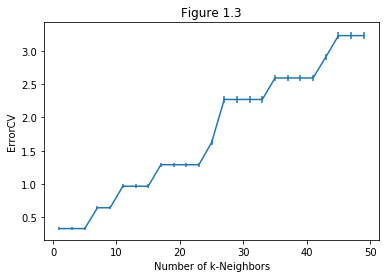

In [302]:
xAxis = []
yAxis = []
yErr = []

for k_neighborsize in range(1,50,2): 
    model = KNeighborsClassifier(n_neighbors=k_neighborsize, metric = "euclidean")
    accuracy = []
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)
    xAxis.append(k_neighborsize)
    yAxis.append(100*(1-accuracy.mean()))
    yErr.append(accuracy.std()*2)
    
mp.errorbar(xAxis, yAxis, xerr=0, yerr = yErr)
mp.title("Figure 1.3")
mp.xlabel("Number of k-Neighbors")
mp.ylabel("ErrorCV")
mp.show()


4a: I believe the 1 nearest neighbor provides the best result. Not only does it have the lowest amount of visible error, through analysis of the standard deviation, it also has the lowest variance with respect to standard deviation. It can be argued that you can have similar results up to k ~ 6, but since we achieve the same result with k = 1, it is simpler to just use 1 neighbor.

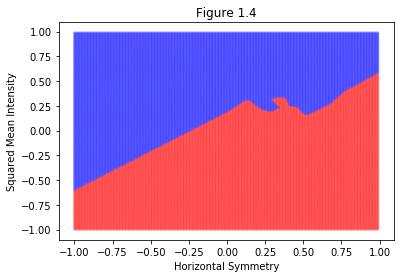

In [303]:
model = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
model.fit(simpleTrain,trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("r")
        else:
            cPred.append("b")

mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.2, )
mp.title("Figure 1.4")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")
show()

4b: Because we have found our optimal k value to be 1, Figure 1.4 reflects what is presented in Figure 1.2. This is overfitted, as we are trying to match what is closest to each data point, thus small clusters of data will have higher relevancy when creating the region chart. The overfitting is also shown apparent through the fact that there is the least amount of error, meaning that it is trying its best to fit all of the data points.

In [304]:
print("Error with 95% Confidence Interval")
for i in range(0,len(yErr)):
    print("k-Neighbor:", xAxis[i], "   Error:", yAxis[i], "+/-", yErr[i])


Error with 95% Confidence Interval
k-Neighbor: 1    Error: 0.33333333333332993 +/- 0.019999999999999997
k-Neighbor: 3    Error: 0.33333333333332993 +/- 0.019999999999999997
k-Neighbor: 5    Error: 0.33333333333332993 +/- 0.019999999999999997
k-Neighbor: 7    Error: 0.6458333333333344 +/- 0.025850128948743497
k-Neighbor: 9    Error: 0.6458333333333344 +/- 0.025850128948743497
k-Neighbor: 11    Error: 0.9684139784946089 +/- 0.029600207456665348
k-Neighbor: 13    Error: 0.9684139784946089 +/- 0.029600207456665348
k-Neighbor: 15    Error: 0.9684139784946089 +/- 0.029600207456665348
k-Neighbor: 17    Error: 1.2909946236559167 +/- 0.031636510208656834
k-Neighbor: 19    Error: 1.2909946236559167 +/- 0.031636510208656834
k-Neighbor: 21    Error: 1.2909946236559167 +/- 0.031636510208656834
k-Neighbor: 23    Error: 1.2909946236559167 +/- 0.031636510208656834
k-Neighbor: 25    Error: 1.6243279569892466 +/- 0.04410773666939198
k-Neighbor: 27    Error: 2.269489247311829 +/- 0.05104477195067443
k-Ne

4c: From the information above, we extrapolate that the least variance is where 1<=k<7. Thus, similarly in Figure 1.4, we choose where k=1. Because this is also where we have the least error, we reason that this is an overfit model since the data closely matches the expected results, and the variance is small due to how closely fit the prediction model is to the expected.